In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 64 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=64, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1,

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0001)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0001)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

118it [00:29,  3.99it/s]                         


Epoch 1 of 100
Generator loss: 1.02583693, Discriminator loss: 0.45196008


118it [00:14,  7.97it/s]                         


Epoch 2 of 100
Generator loss: 2.05183957, Discriminator loss: 0.41732408


118it [00:14,  7.93it/s]                         


Epoch 3 of 100
Generator loss: 2.19728936, Discriminator loss: 0.57579835


118it [00:14,  7.94it/s]                         


Epoch 4 of 100
Generator loss: 2.83770654, Discriminator loss: 0.33486208


118it [00:14,  7.99it/s]                         


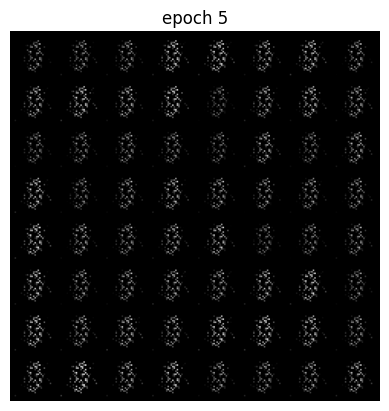

Epoch 5 of 100
Generator loss: 0.92139032, Discriminator loss: 0.64409979


118it [00:15,  7.83it/s]                         


Epoch 6 of 100
Generator loss: 1.14603953, Discriminator loss: 0.58719453


118it [00:17,  6.61it/s]                         


Epoch 7 of 100
Generator loss: 1.51575544, Discriminator loss: 0.66022357


118it [00:15,  7.75it/s]                         


Epoch 8 of 100
Generator loss: 1.22738085, Discriminator loss: 0.59519214


118it [00:15,  7.81it/s]                         


Epoch 9 of 100
Generator loss: 1.42180188, Discriminator loss: 0.55949295


118it [00:14,  7.88it/s]                         


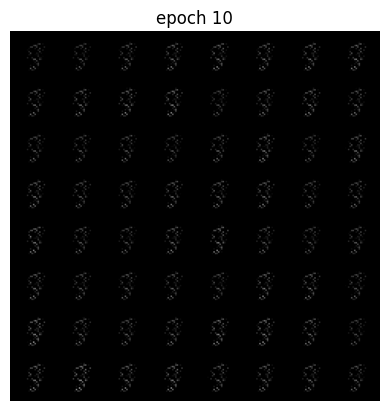

Epoch 10 of 100
Generator loss: 1.35728090, Discriminator loss: 0.47394014


118it [00:15,  7.83it/s]                         


Epoch 11 of 100
Generator loss: 1.66327948, Discriminator loss: 0.43507012


118it [00:14,  7.87it/s]                         


Epoch 12 of 100
Generator loss: 2.83734294, Discriminator loss: 0.29953998


118it [00:14,  8.02it/s]                         


Epoch 13 of 100
Generator loss: 2.62081959, Discriminator loss: 0.30443803


118it [00:14,  7.98it/s]                         


Epoch 14 of 100
Generator loss: 4.05789308, Discriminator loss: 0.17483418


118it [00:15,  7.72it/s]                         


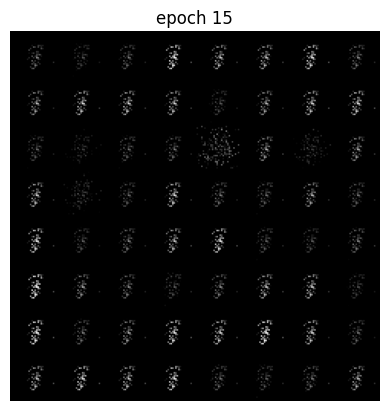

Epoch 15 of 100
Generator loss: 3.53559981, Discriminator loss: 0.15718063


118it [00:15,  7.60it/s]                         


Epoch 16 of 100
Generator loss: 3.44795883, Discriminator loss: 0.15784279


118it [00:15,  7.51it/s]                         


Epoch 17 of 100
Generator loss: 3.43353809, Discriminator loss: 0.25725217


118it [00:14,  7.90it/s]                         


Epoch 18 of 100
Generator loss: 3.97234755, Discriminator loss: 0.15093271


118it [00:15,  7.75it/s]                         


Epoch 19 of 100
Generator loss: 4.14598771, Discriminator loss: 0.13977579


118it [00:15,  7.81it/s]                         


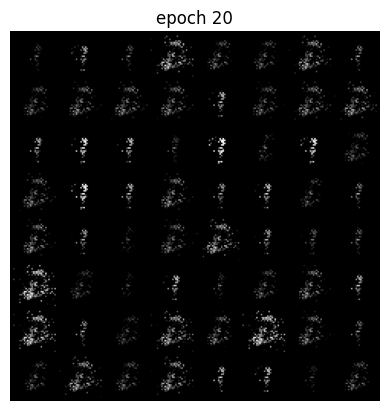

Epoch 20 of 100
Generator loss: 4.27404314, Discriminator loss: 0.11864797


118it [00:15,  7.86it/s]                         


Epoch 21 of 100
Generator loss: 4.44127053, Discriminator loss: 0.12708610


118it [00:15,  7.84it/s]                         


Epoch 22 of 100
Generator loss: 5.18515798, Discriminator loss: 0.09210857


118it [00:15,  7.67it/s]                         


Epoch 23 of 100
Generator loss: 4.83275275, Discriminator loss: 0.08179400


118it [00:15,  7.64it/s]                         


Epoch 24 of 100
Generator loss: 4.80660648, Discriminator loss: 0.10292642


118it [00:15,  7.83it/s]                         


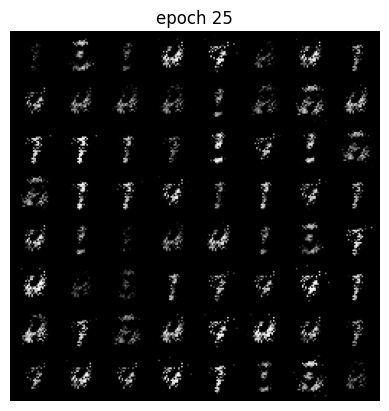

Epoch 25 of 100
Generator loss: 4.85509897, Discriminator loss: 0.14351572


118it [00:15,  7.63it/s]                         


Epoch 26 of 100
Generator loss: 4.82315379, Discriminator loss: 0.10394842


118it [00:15,  7.65it/s]                         


Epoch 27 of 100
Generator loss: 5.01964895, Discriminator loss: 0.08996457


118it [00:15,  7.61it/s]                         


Epoch 28 of 100
Generator loss: 5.03856971, Discriminator loss: 0.11393949


118it [00:15,  7.69it/s]                         


Epoch 29 of 100
Generator loss: 4.86221678, Discriminator loss: 0.13962625


118it [00:15,  7.74it/s]                         


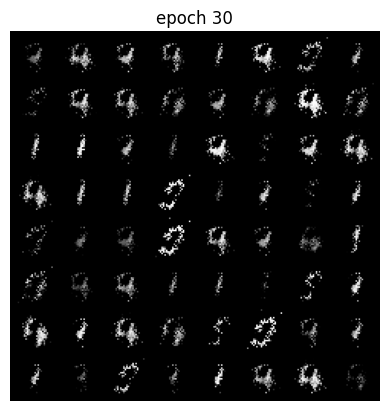

Epoch 30 of 100
Generator loss: 4.75308492, Discriminator loss: 0.11451242


118it [00:15,  7.65it/s]                         


Epoch 31 of 100
Generator loss: 4.94021784, Discriminator loss: 0.08782818


118it [00:15,  7.80it/s]                         


Epoch 32 of 100
Generator loss: 4.36228727, Discriminator loss: 0.15611613


118it [00:15,  7.73it/s]                         


Epoch 33 of 100
Generator loss: 4.49125478, Discriminator loss: 0.15014811


118it [00:15,  7.67it/s]                         


Epoch 34 of 100
Generator loss: 4.73338471, Discriminator loss: 0.11181342


118it [00:15,  7.66it/s]                         


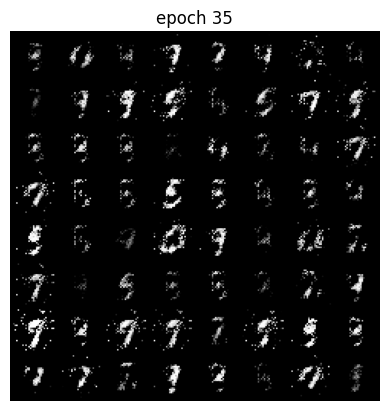

Epoch 35 of 100
Generator loss: 4.61093823, Discriminator loss: 0.14763829


118it [00:15,  7.68it/s]                         


Epoch 36 of 100
Generator loss: 4.61637305, Discriminator loss: 0.13264247


118it [00:15,  7.47it/s]                         


Epoch 37 of 100
Generator loss: 4.72228392, Discriminator loss: 0.11766476


118it [00:15,  7.50it/s]                         


Epoch 38 of 100
Generator loss: 5.15282689, Discriminator loss: 0.11401880


118it [00:15,  7.68it/s]                         


Epoch 39 of 100
Generator loss: 5.25572782, Discriminator loss: 0.11690822


118it [00:15,  7.81it/s]                         


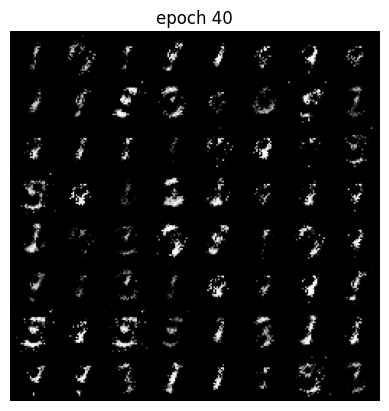

Epoch 40 of 100
Generator loss: 4.94174690, Discriminator loss: 0.12603794


118it [00:15,  7.75it/s]                         


Epoch 41 of 100
Generator loss: 4.86268465, Discriminator loss: 0.09813231


118it [00:15,  7.69it/s]                         


Epoch 42 of 100
Generator loss: 5.03377711, Discriminator loss: 0.10027281


118it [00:15,  7.51it/s]                         


Epoch 43 of 100
Generator loss: 4.95800093, Discriminator loss: 0.11485306


118it [00:15,  7.82it/s]                         


Epoch 44 of 100
Generator loss: 5.03191035, Discriminator loss: 0.11193535


118it [00:15,  7.66it/s]                         


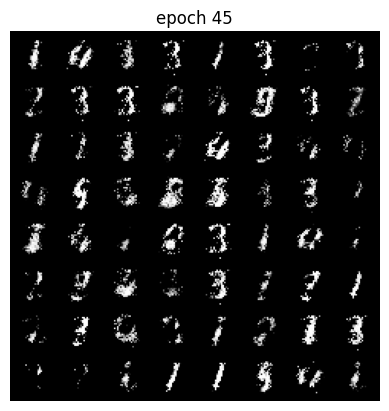

Epoch 45 of 100
Generator loss: 4.71438716, Discriminator loss: 0.14168500


118it [00:15,  7.51it/s]                         


Epoch 46 of 100
Generator loss: 4.71807122, Discriminator loss: 0.12462792


118it [00:15,  7.39it/s]                         


Epoch 47 of 100
Generator loss: 4.39438186, Discriminator loss: 0.12965813


118it [00:15,  7.66it/s]                         


Epoch 48 of 100
Generator loss: 4.29124831, Discriminator loss: 0.13436463


118it [00:15,  7.65it/s]                         


Epoch 49 of 100
Generator loss: 4.13015474, Discriminator loss: 0.14355738


118it [00:15,  7.62it/s]                         


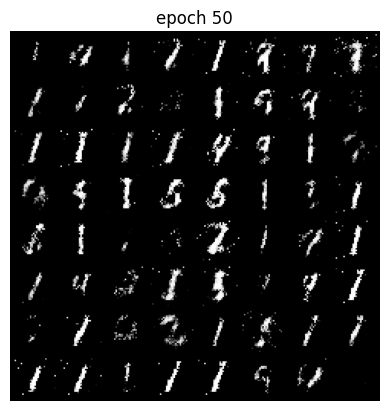

Epoch 50 of 100
Generator loss: 4.19000498, Discriminator loss: 0.13094611


118it [00:15,  7.49it/s]                         


Epoch 51 of 100
Generator loss: 4.26291028, Discriminator loss: 0.13654374


118it [00:15,  7.63it/s]                         


Epoch 52 of 100
Generator loss: 4.16966203, Discriminator loss: 0.14793116


118it [00:15,  7.75it/s]                         


Epoch 53 of 100
Generator loss: 4.09765752, Discriminator loss: 0.13658835


118it [00:15,  7.62it/s]                         


Epoch 54 of 100
Generator loss: 4.14399784, Discriminator loss: 0.14261905


118it [00:15,  7.62it/s]                         


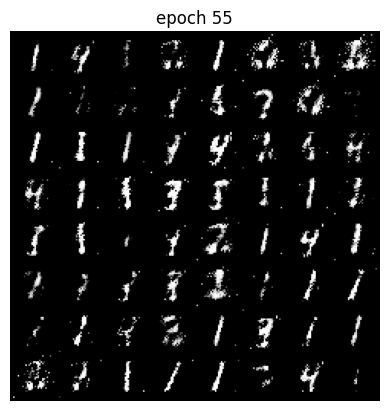

Epoch 55 of 100
Generator loss: 4.11478703, Discriminator loss: 0.15236648


118it [00:15,  7.49it/s]                         


Epoch 56 of 100
Generator loss: 3.91612788, Discriminator loss: 0.15305596


118it [00:15,  7.48it/s]                         


Epoch 57 of 100
Generator loss: 3.84997607, Discriminator loss: 0.14003955


118it [00:15,  7.43it/s]                         


Epoch 58 of 100
Generator loss: 3.79946435, Discriminator loss: 0.15118866


118it [00:15,  7.52it/s]                         


Epoch 59 of 100
Generator loss: 3.52453733, Discriminator loss: 0.15854461


118it [00:15,  7.66it/s]                         


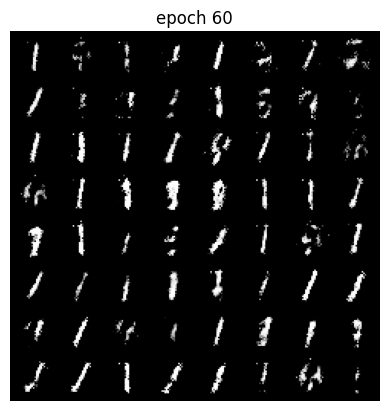

Epoch 60 of 100
Generator loss: 3.42721612, Discriminator loss: 0.16984026


118it [00:15,  7.66it/s]                         


Epoch 61 of 100
Generator loss: 3.34010261, Discriminator loss: 0.17440759


118it [00:15,  7.48it/s]                         


Epoch 62 of 100
Generator loss: 3.37185550, Discriminator loss: 0.17441334


118it [00:15,  7.66it/s]                         


Epoch 63 of 100
Generator loss: 3.43012413, Discriminator loss: 0.17063060


118it [00:15,  7.70it/s]                         


Epoch 64 of 100
Generator loss: 3.36206798, Discriminator loss: 0.18070464


118it [00:15,  7.49it/s]                         


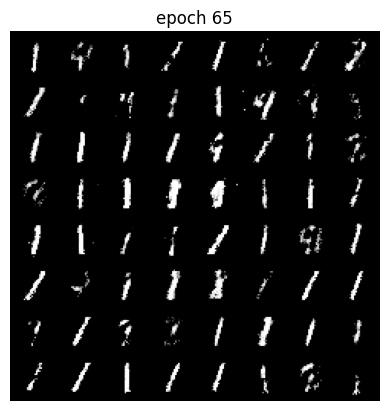

Epoch 65 of 100
Generator loss: 3.45477311, Discriminator loss: 0.16897384


118it [00:16,  7.26it/s]                         


Epoch 66 of 100
Generator loss: 3.15660503, Discriminator loss: 0.17915580


118it [00:15,  7.44it/s]                         


Epoch 67 of 100
Generator loss: 3.14510106, Discriminator loss: 0.17990612


118it [00:15,  7.48it/s]                         


Epoch 68 of 100
Generator loss: 3.17674611, Discriminator loss: 0.17638319


118it [00:15,  7.59it/s]                         


Epoch 69 of 100
Generator loss: 3.15968695, Discriminator loss: 0.18354789


118it [00:15,  7.42it/s]                         


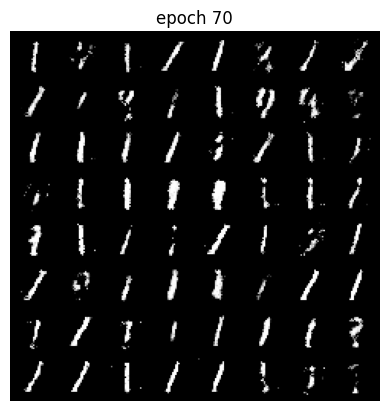

Epoch 70 of 100
Generator loss: 3.22028050, Discriminator loss: 0.17006635


118it [00:15,  7.56it/s]                         


Epoch 71 of 100
Generator loss: 3.14783800, Discriminator loss: 0.17723905


118it [00:16,  7.37it/s]                         


Epoch 72 of 100
Generator loss: 3.08613087, Discriminator loss: 0.17097511


118it [00:15,  7.50it/s]                         


Epoch 73 of 100
Generator loss: 3.03174325, Discriminator loss: 0.18681772


118it [00:16,  7.36it/s]                         


Epoch 74 of 100
Generator loss: 3.17194795, Discriminator loss: 0.17858972


118it [00:15,  7.48it/s]                         


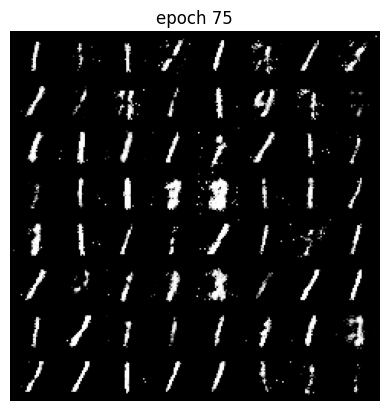

Epoch 75 of 100
Generator loss: 3.14818000, Discriminator loss: 0.18288662


118it [00:15,  7.38it/s]                         


Epoch 76 of 100
Generator loss: 3.21607333, Discriminator loss: 0.18391062


118it [00:15,  7.47it/s]                         


Epoch 77 of 100
Generator loss: 3.05019751, Discriminator loss: 0.19256391


118it [00:15,  7.59it/s]                         


Epoch 78 of 100
Generator loss: 2.95712168, Discriminator loss: 0.19081100


118it [00:15,  7.59it/s]                         


Epoch 79 of 100
Generator loss: 2.91813103, Discriminator loss: 0.20349363


118it [00:15,  7.61it/s]                         


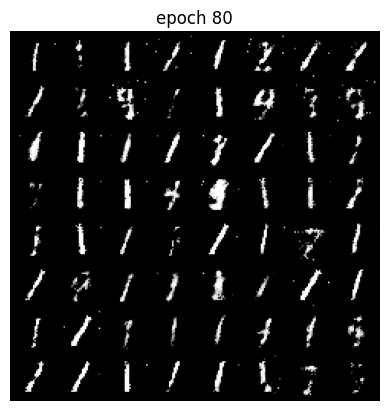

Epoch 80 of 100
Generator loss: 2.87208209, Discriminator loss: 0.21411555


118it [00:15,  7.47it/s]                         


Epoch 81 of 100
Generator loss: 2.86905532, Discriminator loss: 0.21386158


118it [00:15,  7.54it/s]                         


Epoch 82 of 100
Generator loss: 2.90990354, Discriminator loss: 0.20845124


118it [00:15,  7.51it/s]                         


Epoch 83 of 100
Generator loss: 2.92096333, Discriminator loss: 0.20704024


118it [00:16,  7.30it/s]                         


Epoch 84 of 100
Generator loss: 2.94884360, Discriminator loss: 0.21290285


118it [00:15,  7.39it/s]                         


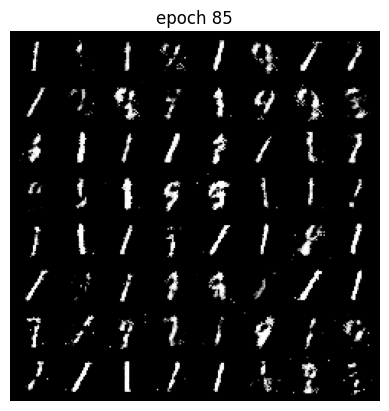

Epoch 85 of 100
Generator loss: 2.87851697, Discriminator loss: 0.20589206


118it [00:15,  7.40it/s]                         


Epoch 86 of 100
Generator loss: 2.82457192, Discriminator loss: 0.21401995


118it [00:15,  7.61it/s]                         


Epoch 87 of 100
Generator loss: 2.78971982, Discriminator loss: 0.21440068


118it [00:15,  7.61it/s]                         


Epoch 88 of 100
Generator loss: 2.91935069, Discriminator loss: 0.21888757


118it [00:15,  7.45it/s]                         


Epoch 89 of 100
Generator loss: 3.03144394, Discriminator loss: 0.21075879


118it [00:15,  7.57it/s]                         


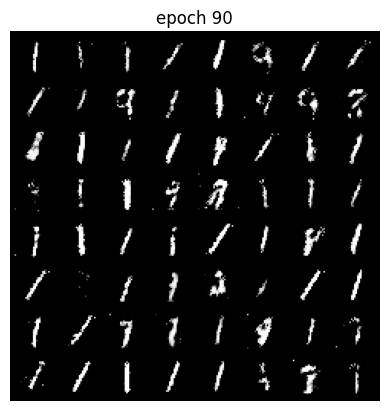

Epoch 90 of 100
Generator loss: 2.90185080, Discriminator loss: 0.22146475


118it [00:16,  7.37it/s]                         


Epoch 91 of 100
Generator loss: 2.82565344, Discriminator loss: 0.23895824


118it [00:16,  7.33it/s]                         


Epoch 92 of 100
Generator loss: 2.58843646, Discriminator loss: 0.23617923


118it [00:16,  7.30it/s]                         


Epoch 93 of 100
Generator loss: 2.76162471, Discriminator loss: 0.22040656


118it [00:15,  7.51it/s]                         


Epoch 94 of 100
Generator loss: 2.84390519, Discriminator loss: 0.23409618


118it [00:15,  7.50it/s]                         


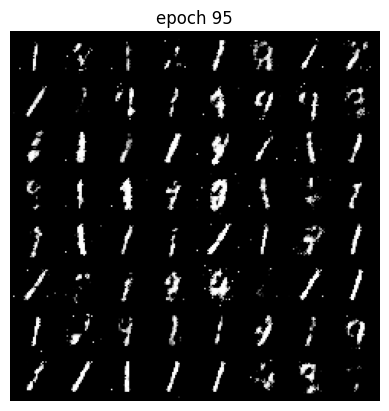

Epoch 95 of 100
Generator loss: 2.82584056, Discriminator loss: 0.23258319


118it [00:15,  7.50it/s]                         


Epoch 96 of 100
Generator loss: 2.77545983, Discriminator loss: 0.22940336


118it [00:15,  7.51it/s]                         


Epoch 97 of 100
Generator loss: 2.66760428, Discriminator loss: 0.22830106


118it [00:15,  7.56it/s]                         


Epoch 98 of 100
Generator loss: 2.68896206, Discriminator loss: 0.24162528


118it [00:15,  7.41it/s]                         


Epoch 99 of 100
Generator loss: 2.63488916, Discriminator loss: 0.24264734


118it [00:16,  7.34it/s]                         


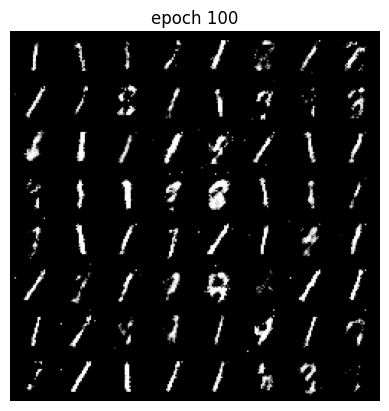

Epoch 100 of 100
Generator loss: 2.65732187, Discriminator loss: 0.24778329


In [14]:
torch.manual_seed(3276)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label)
    ######################################

def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label)
    ######################################


for epoch in range(epochs):
# for epoch in range(30):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
    # for bi, data in tqdm(enumerate(train_loader), total=30):
        ############ YOUR CODE HERE ##########
        realImg,_ = data
        realImg = realImg.view(-1, 28*28).to(device)

        lblR = label_real(realImg.shape[0])
        lblF = label_fake(realImg.shape[0])

        noiseSamp = create_noise(realImg.shape[0], nz)
        fakeImg = generator(noiseSamp)

        discR = discriminator(realImg)
        lossR = discriminator_loss(discR, lblR)
        discF = discriminator(fakeImg)
        lossF = discriminator_loss(discF, lblF)

        lossDiscTotal = (lossR + lossF) / 2
        loss_d += lossDiscTotal.item()

        discriminator.zero_grad()
        lossDiscTotal.backward(retain_graph = True)
        optim_d.step()

        discF_new = discriminator(fakeImg)

        lossGen = generator_loss(discF_new, lblR)
        loss_g += lossGen.item()

        generator.zero_grad()
        lossGen.backward()
        optim_g.step()

        ######################################


    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()

    # make the images as grid
    generated_img = make_grid(generated_img)

    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()

    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)

    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [15]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [16]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

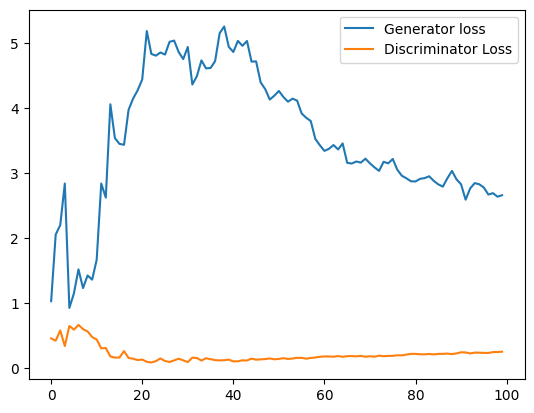

In [17]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')